### This is the dataset for second hand(used) cars where we need to predict the price of the car depending on the brand, model, mileage,engine volume and many other factors that can affect the prices of the car
#### 1. Initial step involves preprocessing of the dataset and then visualizing our dataset
#### 2. Next Linear Regression model is created using the sklearn module of python
#### 3. The data is first trained using the train dataset and then tested for the maximum accuracy of our model

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
# loading the data from .csv file
raw_data=pd.read_csv('1.04. Real-life example.csv')
# Exploring the first 8 rows of our dataset
raw_data.head(8)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6


In [3]:
# Exploring the descriptive statistics of the variables
raw_data.describe(include='all')
# As can be seen categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Dealing with missing data

In [4]:
raw_data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
# we drop all the missing values only when we are missing less than 5% of the total missing data
data_no_mv=raw_data.dropna(axis=0)

In [6]:
# Again generating the descriptive analysis of the variables
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
# Counting total number of unique items for each categories
for col in data_no_mv:
    c=len(pd.Index(data_no_mv[col]).value_counts())
    print(data_no_mv[col].name+":"+str(c))

Brand:7
Price:892
Body:6
Mileage:407
EngineV:72
Engine Type:4
Registration:2
Year:39
Model:306


In [8]:
pd.crosstab(data_no_mv['Brand'],data_no_mv['Model'])

Model,1 Series,100,11,116,118,120,19,190,200,21,...,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris,Z3,Z4
Brand,,,,,,,,,,,,,,,,,,,,,
Audi,0,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BMW,1,0,0,3,4,1,0,0,0,0,...,0,11,12,111,9,37,4,0,1,5
Mercedes-Benz,0,0,0,0,0,0,0,8,6,0,...,156,0,0,0,0,0,0,0,0,0
Mitsubishi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Renault,0,0,1,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Toyota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0
Volkswagen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploring the PDFs
## 1. Price

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

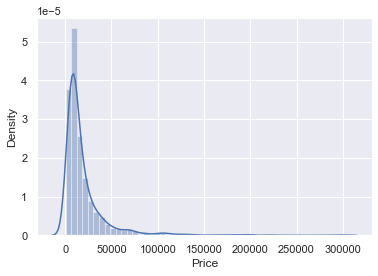

In [9]:
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])
# this shows exponential variation instead of normal distribution

In [10]:
# There are outliers present. we need to remove them by dropping 0.5% or 1% of the problematic samples
# Here outliers are situated at the higher price
# declare a variable that will be 99th percentile of the 'Price' variable
q=data_no_mv['Price'].quantile(0.95)
data1=data_no_mv[data_no_mv['Price']<q]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3823,3823.000000,3823,3823.000000,3823.000000,3823,3823,3823.000000,3823
unique,7,NaN,6,NaN,NaN,4,2,NaN,294
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,872,NaN,1491,NaN,NaN,1740,3452,NaN,188
mean,NaN,14911.796798,NaN,171.095998,2.715250,NaN,NaN,2005.934868,NaN
std,NaN,12198.369515,NaN,99.269432,5.052605,NaN,NaN,6.565549,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6800.000000,NaN,100.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,10900.000000,NaN,163.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,19150.000000,NaN,234.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

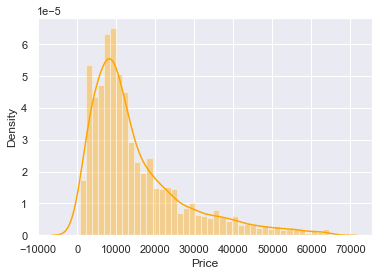

In [11]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data1['Price'],color='orange')

## 2. Mileage

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

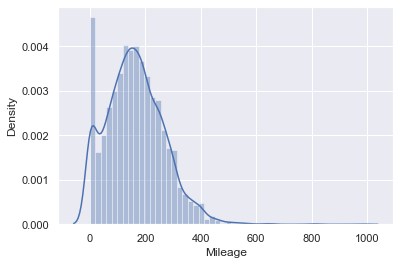

In [12]:
sns.distplot(data_no_mv['Mileage'])

In [13]:
q=data1['Mileage'].quantile(0.99)
data2=data1[data1['Mileage']<q]

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

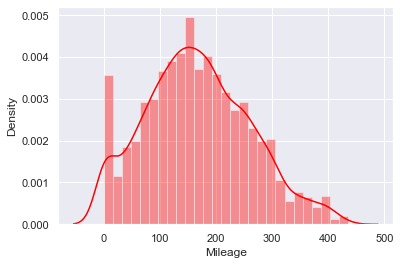

In [14]:
sns.distplot(data2['Mileage'],color='red')

## 3. EngineVolume

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

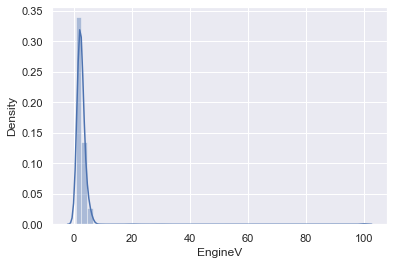

In [15]:
sns.distplot(data_no_mv['EngineV'])

In [16]:
# Car engine volumes are usnually below 6.5l
data3=data2[data2['EngineV']<6.5]

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

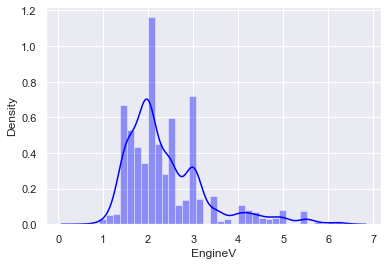

In [17]:
sns.distplot(data3['EngineV'],color='blue')

## 4. Year

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

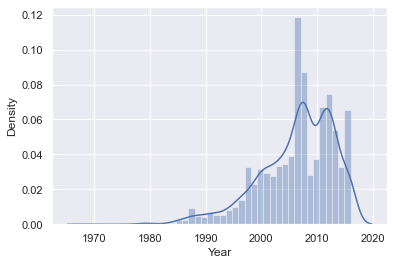

In [18]:
sns.distplot(data_no_mv['Year'])

In [19]:
# Outliers are on the lower end
q=data3['Year'].quantile(0.01)
data4=data3[data3['Year']>q]
data4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3707,3707.000000,3707,3707.000000,3707.000000,3707,3707,3707.000000,3707
unique,7,NaN,6,NaN,NaN,4,2,NaN,282
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,840,NaN,1430,NaN,NaN,1695,3345,NaN,181
mean,NaN,15206.739496,NaN,166.731589,2.408435,NaN,NaN,2006.360399,NaN
std,NaN,12213.872637,NaN,92.674124,0.920792,NaN,NaN,5.982401,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11115.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,19750.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

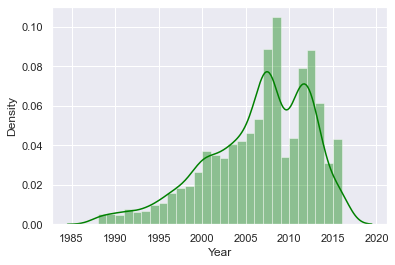

In [20]:
sns.distplot(data4['Year'],color='green')

## Reseting index

In [21]:
# When we remove observations, the original indexes are preserved
# Finally, once we reset the index, a new column will be created containing the old index (just in case)
data_cleaned=data4.reset_index(drop=True)
data_cleaned.head(8)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
6,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
7,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [22]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3707,3707.000000,3707,3707.000000,3707.000000,3707,3707,3707.000000,3707
unique,7,NaN,6,NaN,NaN,4,2,NaN,282
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,840,NaN,1430,NaN,NaN,1695,3345,NaN,181
mean,NaN,15206.739496,NaN,166.731589,2.408435,NaN,NaN,2006.360399,NaN
std,NaN,12213.872637,NaN,92.674124,0.920792,NaN,NaN,5.982401,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11115.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,19750.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [23]:
data_cleaned=data_cleaned.drop(['Model'],axis=1)

## Cleaning the OLS assumptions

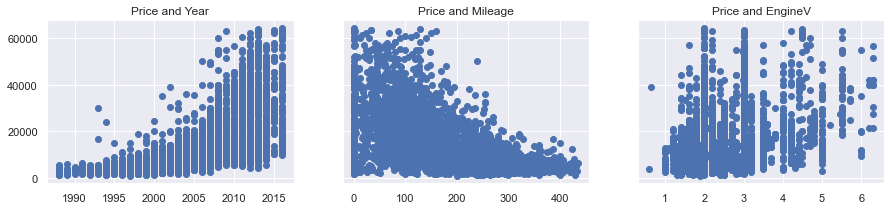

In [24]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax2.set_title('Price and Mileage')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.set_title('Price and EngineV')
plt.show()

In [25]:
# we can see that price is exponentially distributed 
# hence, change the prices to log form becomes important
log_Price=np.log(data_cleaned['Price'])

In [26]:
data_cleaned['Log_Price']=log_Price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3702,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3703,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3704,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3705,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


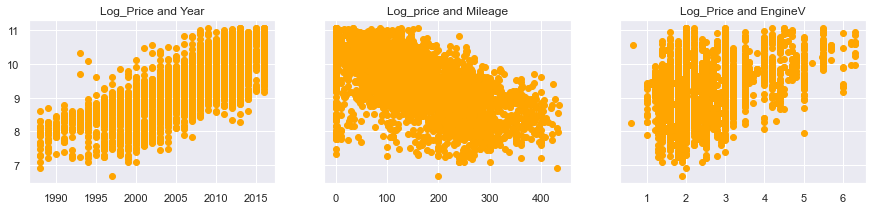

In [27]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Log_Price'],color='orange')
ax1.set_title('Log_Price and Year')
ax2.scatter(data_cleaned['Mileage'],data_cleaned['Log_Price'],color='orange')
ax2.set_title('Log_price and Mileage')
ax3.scatter(data_cleaned['EngineV'],data_cleaned['Log_Price'],color='orange')
ax3.set_title('Log_Price and EngineV')
plt.show()

In [28]:
# Now the plots show linear relationship
# Finally drop the price columns
data_cleaned=data_cleaned.drop(['Price'],axis=1)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


## Multicollinearity

In [29]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables=data_cleaned[['Mileage','Year','EngineV']]
variables.values

array([[2.770e+02, 1.991e+03, 2.000e+00],
       [4.270e+02, 1.999e+03, 2.900e+00],
       [3.580e+02, 2.003e+03, 5.000e+00],
       ...,
       [3.500e+01, 2.014e+03, 1.600e+00],
       [1.000e+00, 1.999e+03, 3.500e+00],
       [1.240e+02, 2.013e+03, 2.000e+00]])

In [31]:
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif['Features']=variables.columns

In [32]:
vif

,VIF,Features
0,4.233150,Mileage
1,10.355853,Year
2,7.882953,EngineV


In [33]:
# Since year has the highest VIF, it is better to remove this
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [34]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [35]:
data_no_multicollinearity.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Log_Price'], dtype=object)

In [36]:
variables2=data_no_multicollinearity[['Mileage','EngineV']]
variables2.head()

,Mileage,EngineV
0,277,2.0
1,427,2.9
2,358,5.0
3,240,4.2
4,120,2.0


In [37]:
vif2=pd.DataFrame()
vif2['VIF']=[variance_inflation_factor(variables2.values,i)for i in range(variables2.shape[1])]
vif2['Features']=variables2.columns

In [38]:
vif2

,VIF,Features
0,3.202016,Mileage
1,3.202016,EngineV


## Dropping the dummies

In [39]:
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rearranging the data

In [40]:
#To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
cols=list(data_with_dummies.columns)
cols[0],cols[2]=cols[2],cols[0]

In [41]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,Log_Price,EngineV,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,2.0,277,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,2.9,427,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,5.0,358,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,4.2,240,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,2.0,120,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression model

## Declare the dependent and independent variables

In [42]:
targets=data_preprocessed['Log_Price']
inputs=data_preprocessed.drop(['Log_Price'],axis=1)

## Scale the data

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(inputs)

In [ ]:
# Scale the features and store them in a new variable (the actual scaling procedure)
#inputs_scaled=scaler.transform(inputs)

# Train Test split

In [43]:
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.2,random_state=1)

In [44]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)

StandardScaler()

In [45]:
# Scale the features and store them in a new variable (the actual scaling procedure)
train_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)

## Create the Regression

In [46]:
reg=LinearRegression()
reg.fit(train_scaled,y_train)

LinearRegression()

In [47]:
# Lets check the output of the predictions
y_hat=reg.predict(train_scaled)

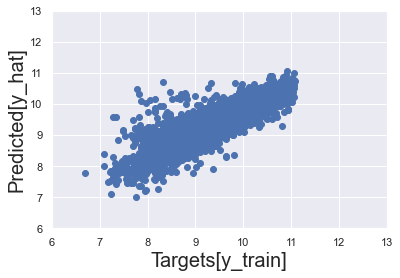

In [48]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train,y_hat)
plt.xlabel('Targets[y_train]',fontsize=20)
plt.ylabel('Predicted[y_hat]',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

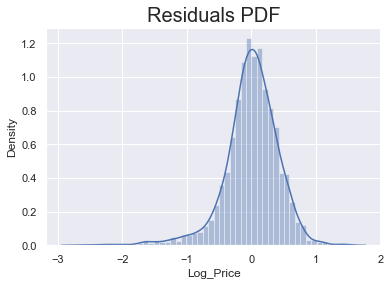

In [49]:
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train-y_hat)
plt.title('Residuals PDF',fontsize=20)

# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)

### Find the R squared and adjusted R squared of the model

In [50]:
r_2=reg.score(train_scaled,y_train)
r_2

0.7129778906027068

In [51]:
n=train_scaled.shape[0]
p=train_scaled.shape[1]
adjusted_r2=1-(1-r_2)*(n-1)/(n-p-1)
adjusted_r2

0.7113221811151758

### Finding the weights and bias

In [52]:
# for bias
reg.intercept_

9.364663203939008

In [53]:
# Create a regression summary where we can compare them with one-another
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,EngineV,0.187320
1,Mileage,-0.382458
2,Brand_BMW,0.016994
3,Brand_Mercedes-Benz,0.002559
4,Brand_Mitsubishi,-0.120070
5,Brand_Renault,-0.171128
6,Brand_Toyota,-0.042763
7,Brand_Volkswagen,-0.072018
8,Body_hatch,-0.138796
9,Body_other,-0.090880


In [54]:
# Check the different categories in the 'Brand' variable

# In this way we can see which 'Brand' is actually the benchmark
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [56]:
# Testing is done on a dataset that the algorithm has never seen
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test=reg.predict(test_scaled)

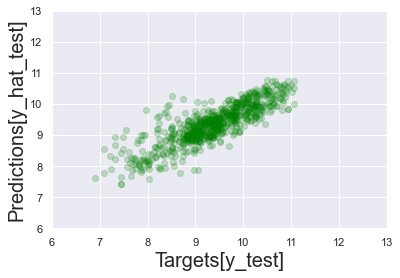

In [57]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test,y_hat_test,color='green',alpha=0.2)
plt.xlabel('Targets[y_test]',fontsize=20)
plt.ylabel('Predictions[y_hat_test]',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [58]:
# To obtain the actual prices, we take the exponential of the log_price
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf.describe(include='all')

,Predictions
count,742.000000
mean,14106.493804
std,8718.879316
min,1655.707742
25%,8010.690977
50%,11829.156202
75%,18186.545998
max,47363.737212


In [59]:
# also include test targets in that data frame
df_pf['Target']=np.exp(y_test)
df_pf.head()

,Predictions,Target
0,18687.968566,NaN
1,9766.823677,NaN
2,22976.855646,NaN
3,6211.682091,23000.0
4,32267.836951,18300.0


In [60]:
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing
# The old indexes are preserved (recall earlier in that code we made a note on that)
# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test=y_test.reset_index(drop=True)
y_test.head()

0    10.126471
1     8.764053
2    10.491274
3     8.724207
4    10.154246
Name: Log_Price, dtype: float64

In [61]:
# overwrite the target column with appropriate values
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,18687.968566,24996.0
1,9766.823677,6400.0
2,22976.855646,36000.0
3,6211.682091,6150.0
4,32267.836951,25700.0
...,...,...
737,6920.865664,4299.0
738,2397.579795,1199.0
739,11053.418891,7750.0
740,4998.928987,4700.0


In [62]:
# Additionally, we can calculate the difference between the targets and the predictions
# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense
df_pf['Residuals']=df_pf['Target']-df_pf['Predictions']
df_pf.head()

,Predictions,Target,Residuals
0,18687.968566,24996.0,6308.031434
1,9766.823677,6400.0,-3366.823677
2,22976.855646,36000.0,13023.144354
3,6211.682091,6150.0,-61.682091
4,32267.836951,25700.0,-6567.836951


In [63]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference %']=np.absolute(df_pf['Residuals']/df_pf['Target']*100)
df_pf.head()

,Predictions,Target,Residuals,Difference %
0,18687.968566,24996.0,6308.031434,25.236164
1,9766.823677,6400.0,-3366.823677,52.606620
2,22976.855646,36000.0,13023.144354,36.175401
3,6211.682091,6150.0,-61.682091,1.002961
4,32267.836951,25700.0,-6567.836951,25.555786


In [64]:
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows=999
#to make the dataset clear, we can display the result with only 2 digits after the dot
pd.set_option('display.float_format',lambda x:'%.2f'%x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference %'])


,Predictions,Target,Residuals,Difference %
238,21504.81,21500.00,-4.81,0.02
607,13289.53,13300.00,10.47,0.08
666,15687.59,15700.00,12.41,0.08
715,4794.95,4800.00,5.05,0.11
452,4510.79,4500.00,-10.79,0.24
490,2691.97,2700.00,8.03,0.30
492,11459.26,11500.00,40.74,0.35
89,39754.90,39900.00,145.10,0.36
512,4978.56,5000.00,21.44,0.43
50,36172.72,36000.00,-172.72,0.48
